In [7]:
from matplotlib import pyplot as plt
import numpy as np
import pydicom
import itk

In [11]:

input_image = pydicom.read_file("/mnt/storage/Evidences/najara_issues/imagem2.dcm")


In [41]:
import cv2
import numpy as np

def quarterize_image(image):
    res = cv2.resize(image, dsize=(image.shape[1]//4, image.shape[0]//4), interpolation=cv2.INTER_CUBIC)
    return res

def quadruplicate_image(image):
    res = cv2.resize(image,dsize=(image.shape[1]*4, image.shape[0]*4), interpolation=cv2.INTER_CUBIC)
    return res

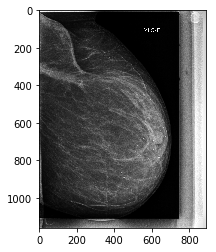

In [42]:

reduced_image = quarterize_image(input_image.pixel_array)
plt.imshow(reduced_image, interpolation='nearest', cmap='gray')
plt.show()

In [45]:

edges = cv2.Canny(np.uint8(reduced_image),100,150,apertureSize = 3)
minLineLength = 200 #np.amin(reduced_image.shape)/2
maxLineGap = 40
lines = cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength,maxLineGap)

In [46]:

plt.imshow(edges,interpolation='nearest')

In [50]:
colored = cv2.cvtColor(reduced_image,cv2.COLOR_GRAY2BGR)
for x1,y1,x2,y2 in lines[:,0,:]:
        print("riscando..",x1,",",y1,"-->",x2,",",y2)
        cv2.line(colored,(x1,y1),(x2,y2),(0,255,0),5)
plt.imshow(colored, interpolation='nearest')
plt.show()

riscando.. 1 , 735 --> 1 , 561
riscando.. 748 , 161 --> 748 , 17
riscando.. 257 , 8 --> 718 , 8
riscando.. 750 , 260 --> 750 , 203
riscando.. 747 , 1101 --> 747 , 659
riscando.. 240 , 1110 --> 415 , 1110
riscando.. 750 , 152 --> 750 , 89
riscando.. 646 , 1113 --> 710 , 1113
riscando.. 262 , 6 --> 308 , 6
riscando.. 641 , 1111 --> 737 , 1111
riscando.. 1 , 162 --> 1 , 202
riscando.. 1 , 113 --> 1 , 157
riscando.. 748 , 637 --> 748 , 593
riscando.. 748 , 306 --> 748 , 362
riscando.. 748 , 420 --> 748 , 372
riscando.. 750 , 514 --> 750 , 468
riscando.. 748 , 421 --> 748 , 467
riscando.. 748 , 187 --> 748 , 243
riscando.. 748 , 495 --> 748 , 551
riscando.. 144 , 1110 --> 194 , 1110


In [29]:
class line_segment_in_image:
    
    def __init__(self,p1, p2,dimx,dimy):
        self.create(p1,p2)
       
        self.define_image_center_projection(dimx,dimy)
        
    def create(self, v1, v2):
        self.v1=v1
        #remember the stupid y,x order
        pte_normal = np.array([v1[1] - v2[1], 0 , v2[0] - v1[0]])
        self.normal= pte_normal // np.linalg.norm(pte_normal.astype(float))
        print("Creating line" + str(v1[0])+ "," + str(v1[1])+" "+str(v2[0])+","+str(v2[1]))
        print ("   normal:"+str(self.normal[0])+","+str(self.normal[1])+","+str(self.normal[2]))    

    def projection(self, p1):
        vec1 = np.array([p1[0] - self.v1[0],0, p1[1] - self.v1[1]])
        d1 = self.normal.dot(vec1.astype(float))#.dot(self.normal)
        return d1
    
    def define_image_center_projection(self, image_width, image_height):
        center = np.array([image_height/2,image_width/2])
        self.center_proj = self.projection(center.astype(float))
        
    def same_side_as_image_center(self, p1):
        return  self.projection(p1) * self.center_proj > 0 

In [30]:
c_lines  = lines[:,0,:]
points = [[(P[0],P[1]),(P[2],P[3])] for P in c_lines]
line_segments = [line_segment_in_image(V[0],V[1],reduced_image.shape[1],reduced_image.shape[0]) for V in points]

Creating line748,739 748,376
   normal:1.0,-0.0,-0.0
Creating line1,677 1,614
   normal:1.0,-0.0,-0.0
Creating line396,1111 740,1111
   normal:-0.0,-0.0,1.0
Creating line747,1103 747,832
   normal:1.0,-0.0,-0.0
Creating line2,130 2,11
   normal:1.0,-0.0,-0.0
Creating line166,9 313,9
   normal:-0.0,-0.0,1.0
Creating line611,8 743,8
   normal:-0.0,-0.0,1.0
Creating line642,6 682,6
   normal:-0.0,-0.0,1.0
Creating line146,1110 220,1110
   normal:-0.0,-0.0,1.0
Creating line1,926 1,874
   normal:1.0,-0.0,-0.0
Creating line748,239 748,295
   normal:-1.0,-0.0,-0.0


Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

In [24]:
copy_of_image = reduced_image.copy()

def less_slow_clean(line_segments, copy_of_image):
    for x in range (0,reduced_image.shape[1]):
        for y in range (0,reduced_image.shape[0]):
            for index,segment in np.ndenumerate(line_segments):
                if False == segment.same_side_as_image_center([x,y]):
                    copy_of_image[y,x]=0
                    line_segments = np.roll(line_segments,-index[0])
                    break
            
%time less_slow_clean(line_segments,copy_of_image)

CPU times: user 1min 10s, sys: 0 ns, total: 1min 10s
Wall time: 1min 10s


In [20]:
copy_of_image = reduced_image.copy()
def slow_clean(line_segments, copy_of_image):
    for x in range (0,reduced_image.shape[1]):
        for y in range (0,reduced_image.shape[0]):
            for segment in line_segments:
                if False == segment.same_side_as_image_center([x,y]):
                    copy_of_image[y,x]=0            
                    break
        
%time slow_clean(line_segments,copy_of_image)

CPU times: user 1min 37s, sys: 1.5 s, total: 1min 38s
Wall time: 1min 36s


In [25]:

copy_of_image = reduced_image.copy()

def better_clean(line_segments, copy_of_image):
    half_width = int(reduced_image.shape[1]/2)
    for y in range(0, reduced_image.shape[0]):
        for x in range(0, half_width):
            abort_x = True
            for segment in line_segments:
                if False == segment.same_side_as_image_center([x,y]):
                        abort_x = False
                        copy_of_image[y,x]=0
                        break
            if abort_x :
                break;
        for x in reversed(range(half_width,reduced_image.shape[1])):
            abort_x = True                  
            for segment in line_segments:
                if False ==segment.same_side_as_image_center([x,y]):
                    abort_x = False
                    copy_of_image[y,x]=0
                    break                    
            if abort_x:                
                break
    return copy_of_image


%time batata = better_clean(line_segments, copy_of_image)

CPU times: user 2.47 s, sys: 0 ns, total: 2.47 s
Wall time: 2.38 s


In [26]:
plt.imshow(batata, interpolation='nearest')
plt.show()

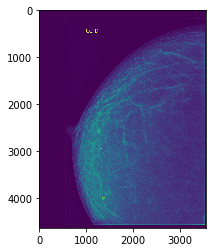

In [41]:
enlarged = quadruplicate_image(copy_of_image)

plt.imshow(enlarged, interpolation='nearest')
plt.show()

In [42]:
input_image.PixelData=enlarged.tobytes()

In [43]:
input_image.save_as("/tmp/batata2.dcm")

In [45]:
import pandas as pd